In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.feature_selection import RFE
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import os
from sklearn.model_selection import GridSearchCV
import pickle
warnings.filterwarnings("ignore")

In [4]:
# Reading the dataset and converting it to a pandas dataframe showing all its columns without truncation.
pd.set_option('display.max_columns', None)
churn_df = pd.read_csv(r"Databel - Data.csv")
churn_df

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Unlimited Data Plan,Extra Data Charges,State,Phone Number,Gender,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,0,3,Yes,0,KS,382-4657,Female,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,0,3,Yes,0,OH,371-7191,Male,49,No,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,0,3,Yes,0,OH,375-9999,Male,51,No,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,0,2,Yes,0,MO,329-9001,Female,41,No,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,0,3,Yes,0,WV,330-8173,Male,51,No,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6682,2940-QHVU,Yes,3,6,16.8,0.0,0.0,No,no,0.0,0,4,Yes,0,SC,362-9895,Female,42,No,No,Yes,2,No,Month-to-Month,Paper Check,19,52,Competitor,Competitor offered higher download speeds
6683,3033-TMYG,Yes,1,7,15.0,0.0,0.0,No,no,0.0,5,17,Yes,0,KY,378-9926,Male,24,Yes,No,Yes,3,Yes,Month-to-Month,Direct Debit,20,20,Competitor,Competitor offered higher download speeds
6684,7029-XDVM,Yes,6,20,46.9,0.0,0.0,No,no,0.0,4,10,Yes,0,NE,328-3647,Male,48,No,No,Yes,6,Yes,Month-to-Month,Paper Check,18,108,Competitor,Competitor made better offer
6685,6614-NAJG,Yes,3,6,15.4,0.0,0.0,No,no,0.0,2,5,Yes,0,MN,346-8275,Female,45,No,No,Yes,5,No,Month-to-Month,Credit Card,15,46,Attitude,Attitude of support person


In [5]:
# Converting all column names to lower case with an underscore as a connector for easy accessing of
# dataframe columns
columns = [col.strip().lower().replace(' ', '_') for col in churn_df.columns]
churn_df.columns = columns

In [6]:
# Getting information about the dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        6687 non-null   object 
 1   churn_label                        6687 non-null   object 
 2   account_length_(in_months)         6687 non-null   int64  
 3   local_calls                        6687 non-null   int64  
 4   local_mins                         6687 non-null   float64
 5   intl_calls                         6687 non-null   float64
 6   intl_mins                          6687 non-null   float64
 7   intl_active                        6687 non-null   object 
 8   intl_plan                          6687 non-null   object 
 9   extra_international_charges        6687 non-null   float64
 10  customer_service_calls             6687 non-null   int64  
 11  avg_monthly_gb_download            6687 non-null   int64

In [7]:
# Getting the number of missing values in Each column
churn_df.isnull().sum()

customer_id                             0
churn_label                             0
account_length_(in_months)              0
local_calls                             0
local_mins                              0
intl_calls                              0
intl_mins                               0
intl_active                             0
intl_plan                               0
extra_international_charges             0
customer_service_calls                  0
avg_monthly_gb_download                 0
unlimited_data_plan                     0
extra_data_charges                      0
state                                   0
phone_number                            0
gender                                  0
age                                     0
under_30                                0
senior                                  0
group                                   0
number_of_customers_in_group            0
device_protection_&_online_backup       0
contract_type                     

In [8]:
# Getting the number of duplicated values in the Dataset.
print('There are {} duplicated columns'.format(churn_df.duplicated().sum()))

There are 0 duplicated columns


## Exploring The Dataset

In [9]:
# Getting a statistical summary of the dataset columns
churn_df.describe(include = 'all').fillna('Cannot be calculated')

,customer_id,churn_label,account_length_(in_months),local_calls,local_mins,intl_calls,intl_mins,intl_active,intl_plan,extra_international_charges,customer_service_calls,avg_monthly_gb_download,unlimited_data_plan,extra_data_charges,state,phone_number,gender,age,under_30,senior,group,number_of_customers_in_group,device_protection_&_online_backup,contract_type,payment_method,monthly_charge,total_charges,churn_category,churn_reason
count,6687,6687,6687.0,6687.0,6687.0,6687.0,6687.0,6687,6687,6687.0,6687.0,6687.0,6687,6687.0,6687,6687,6687,6687.0,6687,6687,6687,6687.0,6687,6687,6687,6687.0,6687.0,1769,1769
unique,6687,2,Cannot be calculated,Cannot be calculated,Cannot be calculated,Cannot be calculated,Cannot be calculated,2,2,Cannot be calculated,Cannot be calculated,Cannot be calculated,2,Cannot be calculated,51,6677,3,Cannot be calculated,2,2,2,Cannot be calculated,2,3,3,Cannot be calculated,Cannot be calculated,5,20
top,4444-BZPU,No,Cannot be calculated,Cannot be calculated,Cannot be calculated,Cannot be calculated,Cannot be calculated,No,no,Cannot be calculated,Cannot be calculated,Cannot be calculated,Yes,Cannot be calculated,WV,359-9794,Male,Cannot be calculated,No,No,No,Cannot be calculated,No,Month-to-Month,Direct Debit,Cannot be calculated,Cannot be calculated,Competitor,Competitor made better offer
freq,1,4891,Cannot be calculated,Cannot be calculated,Cannot be calculated,Cannot be calculated,Cannot be calculated,4116,6036,Cannot be calculated,Cannot be calculated,Cannot be calculated,4494,Cannot be calculated,213,2,3379,Cannot be calculated,5400,5431,5166,Cannot be calculated,4393,3411,3702,Cannot be calculated,Cannot be calculated,805,303
mean,Cannot be calculated,Cannot be calculated,32.33782,130.974129,322.752864,51.097524,130.070624,Cannot be calculated,Cannot be calculated,33.641783,0.915657,6.696276,Cannot be calculated,3.374458,Cannot be calculated,Cannot be calculated,Cannot be calculated,47.448632,Cannot be calculated,Cannot be calculated,Cannot be calculated,0.837894,Cannot be calculated,Cannot be calculated,Cannot be calculated,31.030357,1083.755645,Cannot be calculated,Cannot be calculated
std,Cannot be calculated,Cannot be calculated,24.595689,121.893966,288.619931,103.592369,243.527828,Cannot be calculated,Cannot be calculated,76.346828,1.411484,7.454339,Cannot be calculated,12.565309,Cannot be calculated,Cannot be calculated,Cannot be calculated,16.969893,Cannot be calculated,Cannot be calculated,Cannot be calculated,1.70078,Cannot be calculated,Cannot be calculated,Cannot be calculated,16.288147,1127.074863,Cannot be calculated,Cannot be calculated
min,Cannot be calculated,Cannot be calculated,1.0,1.0,4.0,0.0,0.0,Cannot be calculated,Cannot be calculated,0.0,0.0,0.0,Cannot be calculated,0.0,Cannot be calculated,Cannot be calculated,Cannot be calculated,19.0,Cannot be calculated,Cannot be calculated,Cannot be calculated,0.0,Cannot be calculated,Cannot be calculated,Cannot be calculated,5.0,6.0,Cannot be calculated,Cannot be calculated
25%,Cannot be calculated,Cannot be calculated,9.0,31.0,76.9,0.0,0.0,Cannot be calculated,Cannot be calculated,0.0,0.0,1.0,Cannot be calculated,0.0,Cannot be calculated,Cannot be calculated,Cannot be calculated,33.0,Cannot be calculated,Cannot be calculated,Cannot be calculated,0.0,Cannot be calculated,Cannot be calculated,Cannot be calculated,16.0,181.0,Cannot be calculated,Cannot be calculated
50%,Cannot be calculated,Cannot be calculated,29.0,98.0,250.5,0.0,0.0,Cannot be calculated,Cannot be calculated,0.0,0.0,5.0,Cannot be calculated,0.0,Cannot be calculated,Cannot be calculated,Cannot be calculated,47.0,Cannot be calculated,Cannot be calculated,Cannot be calculated,0.0,Cannot be calculated,Cannot be calculated,Cannot be calculated,31.0,647.0,Cannot be calculated,Cannot be calculated
75%,Cannot be calculated,Cannot be calculated,55.0,199.0,498.05,52.0,140.4,Cannot be calculated,Cannot be calculated,16.4,2.0,9.0,Cannot be calculated,0.0,Cannot be calculated,Cannot be calc

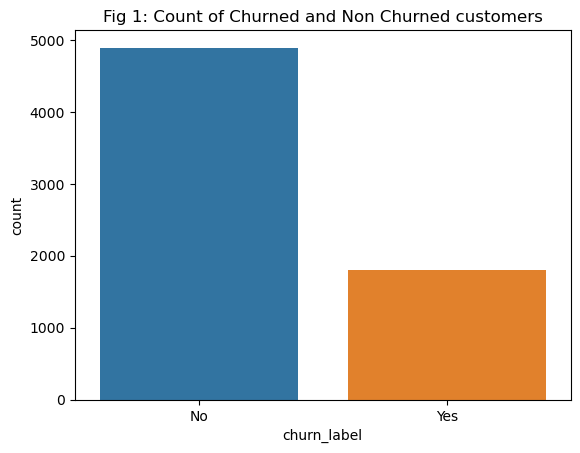

In [10]:
#Geetting a count of churned and non churned customers
sns.countplot(x = 'churn_label', data = churn_df)
plt.title('Fig 1: Count of Churned and Non Churned customers')
plt.show()

There is a presence of class imbalance in the dataset as there are 1769 churned customers and 4918 non churned customers. These 4918 customers are the reasons for the presence of missing values in the churn category and churn reason earlier as they did not churn. The two columns along with some other columns will be later removed as they will serve no purpose in the data modelling.

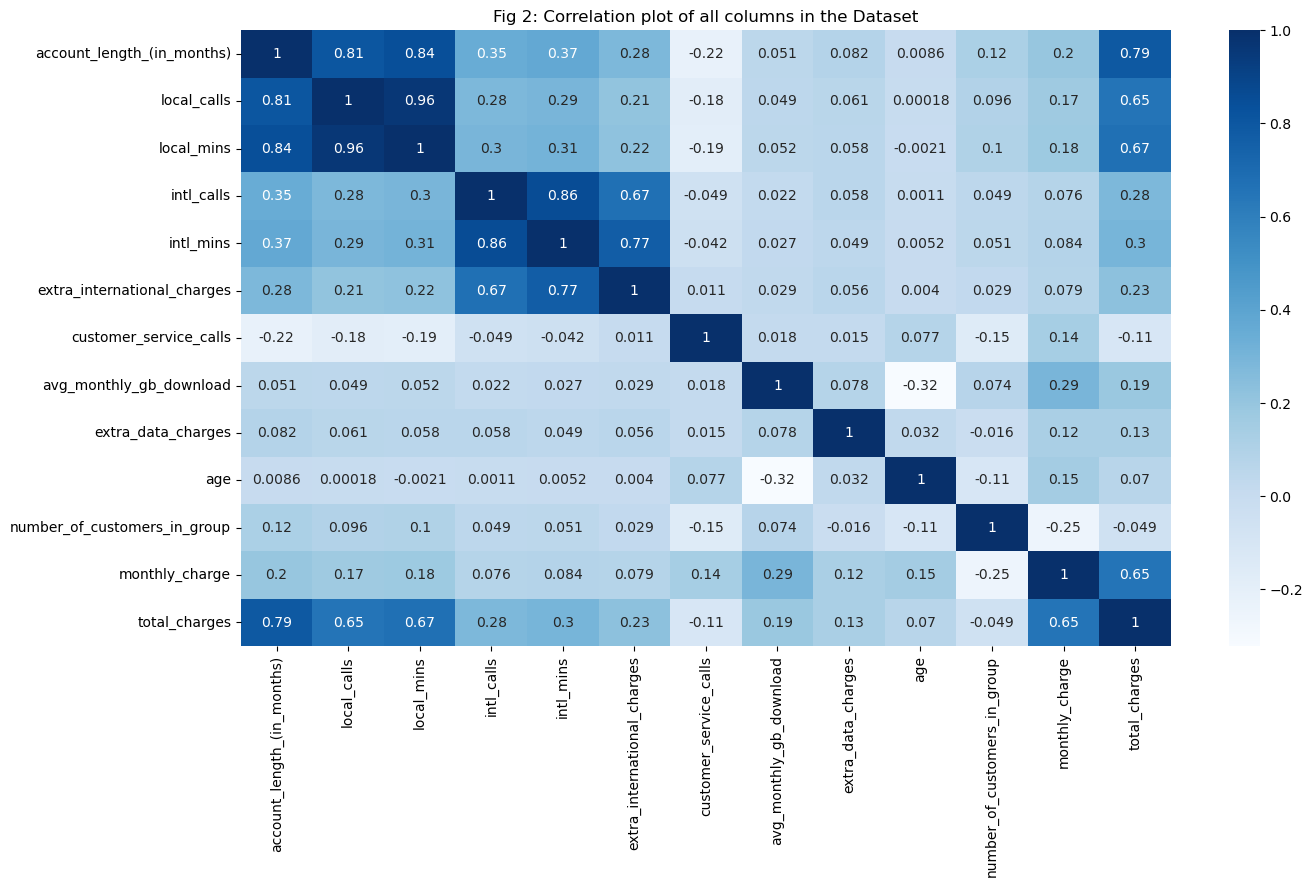

In [11]:
plt.figure(figsize = (15, 8))
sns.heatmap(churn_df.corr(), annot = True, cmap = 'Blues')
plt.title('Fig 2: Correlation plot of all columns in the Dataset')
plt.show()

Fig 2 is a heatmap the correlation coefficient of each features. The 'avg_monthly_gb_download' has a negative correlation with age. This makes sense as the younger demographic tends to spend more time on the internet as compared to the older demographics. From the correlation plot, we can see that many features in the dataset are highly correlated with each other. This can cause the issue of multicollinearity where some features contribution to the model are inflated than others. 

## Data Preprocessing





#### We would need to convert the value in columns such as 'unlimited_data_plan', 'intl_plan', 'intl_active', 'gender', 'under_30', 'senior', 'group' and '	device_protection_&_online_backup' to a numerical format.

In [12]:
# creating a copy of the dataset.
churn = churn_df.copy()

In [13]:
#Creating a dataframe that consist of the columns to be transformed into numerical format. 
process_df = churn[['unlimited_data_plan','intl_plan', 'intl_active', 'gender', 'under_30', 'senior', 'group', 'device_protection_&_online_backup']]

In [14]:
# Converting the columns 
for columns in process_df.columns:
    if columns == 'intl_plan':
        churn[columns] = np.where(churn[columns] == 'yes', 1, 0)
    elif columns == 'gender':
        churn[columns] = np.where(churn[columns] == 'Male', 1, 0)
    else:
        churn[columns] = np.where(churn[columns] == 'Yes', 1, 0)

In [15]:
churn

,customer_id,churn_label,account_length_(in_months),local_calls,local_mins,intl_calls,intl_mins,intl_active,intl_plan,extra_international_charges,customer_service_calls,avg_monthly_gb_download,unlimited_data_plan,extra_data_charges,state,phone_number,gender,age,under_30,senior,group,number_of_customers_in_group,device_protection_&_online_backup,contract_type,payment_method,monthly_charge,total_charges,churn_category,churn_reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,0,0,0.0,0,3,1,0,KS,382-4657,0,35,0,0,0,0,0,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,0,0,0.0,0,3,1,0,OH,371-7191,1,49,0,0,0,0,1,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,0,1,0.0,0,3,1,0,OH,375-9999,1,51,0,0,0,0,1,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,1,1,0.0,0,2,1,0,MO,329-9001,0,41,0,0,0,0,0,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,1,1,0.0,0,3,1,0,WV,330-8173,1,51,0,0,0,0,0,One Year,Direct Debit,28,1720,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6682,2940-QHVU,Yes,3,6,16.8,0.0,0.0,0,0,0.0,0,4,1,0,SC,362-9895,0,42,0,0,1,2,0,Month-to-Month,Paper Check,19,52,Competitor,Competitor offered higher download speeds
6683,3033-TMYG,Yes,1,7,15.0,0.0,0.0,0,0,0.0,5,17,1,0,KY,378-9926,1,24,1,0,1,3,1,Month-to-Month,Direct Debit,20,20,Competitor,Competitor offered higher download speeds
6684,7029-XDVM,Yes,6,20,46.9,0.0,0.0,0,0,0.0,4,10,1,0,NE,328-3647,1,48,0,0,1,6,1,Month-to-Month,Paper Check,18,108,Competitor,Competitor made better offer
6685,6614-NAJG,Yes,3,6,15.4,0.0,0.0,0,0,0.0,2,5,1,0,MN,346-8275,0,45,0,0,1,5,0,Month-to-Month,Credit Card,15,46,Attitude,Attitude of support person


Columns not required for the data modelling will be dropped from the dataset...

In [16]:
churn.drop(['customer_id', 'phone_number', 'churn_category', 'churn_reason'], axis = 1, inplace = True)

In [17]:
churn.columns

Index(['churn_label', 'account_length_(in_months)', 'local_calls',
       'local_mins', 'intl_calls', 'intl_mins', 'intl_active', 'intl_plan',
       'extra_international_charges', 'customer_service_calls',
       'avg_monthly_gb_download', 'unlimited_data_plan', 'extra_data_charges',
       'state', 'gender', 'age', 'under_30', 'senior', 'group',
       'number_of_customers_in_group', 'device_protection_&_online_backup',
       'contract_type', 'payment_method', 'monthly_charge', 'total_charges'],
      dtype='object')

The columns have been dropped successfully thereby reducing the number of columns from 29 to 25. Now the remaining columns of the 'object' type, will be one hot encoded.

In [18]:
churn_ohc = pd.get_dummies(churn, columns = ['state', 'contract_type', 'payment_method'], drop_first = True)

In [19]:
churn_ohc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 76 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   churn_label                        6687 non-null   object 
 1   account_length_(in_months)         6687 non-null   int64  
 2   local_calls                        6687 non-null   int64  
 3   local_mins                         6687 non-null   float64
 4   intl_calls                         6687 non-null   float64
 5   intl_mins                          6687 non-null   float64
 6   intl_active                        6687 non-null   int32  
 7   intl_plan                          6687 non-null   int32  
 8   extra_international_charges        6687 non-null   float64
 9   customer_service_calls             6687 non-null   int64  
 10  avg_monthly_gb_download            6687 non-null   int64  
 11  unlimited_data_plan                6687 non-null   int32

The number of columns has increased to from 25 to 76 and no missing values were gotten from the one hot encoding process. The account_length_(in_months) column will be shortened to account_length.

## Feature Extraction

In [20]:
# A contacted once column will be created to hold the value of 1 for customers who only called the customer
# care line only once and 0 for otherwise.

# A contacted multiple column will be created to hold the value of 1 for customers who only called the customer
# care line multiple times and 0 for otherwise.


churn_ohc['contacted_once'] = np.where(churn_ohc['customer_service_calls'] == 1, 1, 0)
churn_ohc['contacted_multiple_times'] = np.where(churn_ohc['customer_service_calls'] > 1, 1, 0)

In [21]:
churn_ohc['extra_charges'] = churn_ohc['total_charges'] - churn_ohc['monthly_charge'] * churn_ohc['account_length_(in_months)']
churn_ohc

,churn_label,account_length_(in_months),local_calls,local_mins,intl_calls,intl_mins,intl_active,intl_plan,extra_international_charges,customer_service_calls,avg_monthly_gb_download,unlimited_data_plan,extra_data_charges,gender,age,under_30,senior,group,number_of_customers_in_group,device_protection_&_online_backup,monthly_charge,total_charges,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,contract_type_One Year,contract_type_Two Year,payment_method_Direct Debit,payment_method_Paper Check,contacted_once,contacted_multiple_times,extra_charges
0,No,1,3,8.0,0.0,0.0,0,0,0.0,0,3,1,0,0,35,0,0,0,0,0,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,No,33,179,431.3,0.0,0.0,0,0,0.0,0,3,1,0,1,49,0,0,0,0,1,21,703,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,10
2,No,44,82,217.6,0.0,0.0,0,1,0.0,0,3,1,0,1,51,0,0,0,0,1,23,1014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2
3,No,10,47,111.6,60.0,71.0,1,1,0.0,0,2,1,0,0,41,0,0,0,0,0,17,177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
4,No,62,184,621.2,310.0,694.4,1,1,0.0,0,3,1,0,1,51,0,0,0,0,0,28,1720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6682,Yes,3,6,16.8,0.0,0.0,0,0,0.0,0,4,1,0,0,42,0,0,1,2,0,19,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-5
6683,Yes,1,7,15.0,0.0,0.0,0,0,0.0,5,17,1,0,1,24,1,0,1,3,1,20,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6684,Yes,6,20,46.9,0.0,0.0,0,0,0.0,4,10,1,0,1,48,0,0,1,6,1,18,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
6685,Yes,3,6,15.4,0.0,0.0,0,0,0.0,2,5,1,0,0,45,0,0,1,5,0,15,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [22]:
churn_ohc['total_monthly_download_gb'] = churn_ohc['avg_monthly_gb_download'] * churn_ohc['account_length_(in_months)']
churn_ohc

,churn_label,account_length_(in_months),local_calls,local_mins,intl_calls,intl_mins,intl_active,intl_plan,extra_international_charges,customer_service_calls,avg_monthly_gb_download,unlimited_data_plan,extra_data_charges,gender,age,under_30,senior,group,number_of_customers_in_group,device_protection_&_online_backup,monthly_charge,total_charges,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,contract_type_One Year,contract_type_Two Year,payment_method_Direct Debit,payment_method_Paper Check,contacted_once,contacted_multiple_times,extra_charges,total_monthly_download_gb
0,No,1,3,8.0,0.0,0.0,0,0,0.0,0,3,1,0,0,35,0,0,0,0,0,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
1,No,33,179,431.3,0.0,0.0,0,0,0.0,0,3,1,0,1,49,0,0,0,0,1,21,703,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,10,99
2,No,44,82,217.6,0.0,0.0,0,1,0.0,0,3,1,0,1,51,0,0,0,0,1,23,1014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,132
3,No,10,47,111.6,60.0,71.0,1,1,0.0,0,2,1,0,0,41,0,0,0,0,0,17,177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,20
4,No,62,184,621.2,310.0,694.4,1,1,0.0,0,3,1,0,1,51,0,0,0,0,0,28,1720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,-16,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6682,Yes,3,6,16.8,0.0,0.0,0,0,0.0,0,4,1,0,0,42,0,0,1,2,0,19,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-5,12
6683,Yes,1,7,15.0,0.0,0.0,0,0,0.0,5,17,1,0,1,24,1,0,1,3,1,20,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,17
6684,Yes,6,20,46.9,0.0,0.0,0,0,0.0,4,10,1,0,1,48,0,0,1,6,1,18,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,60
6685,Yes,3,6,15.4,0.0,0.0,0,0,0.0,2,5,1,0,0,45,0,0,1,5,0,15,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,15


In [23]:
churn_ohc.rename({'account_length_(in_months)': 'tenure'}, axis = 1, inplace = True)

Splitting the dataset into independent variable and target variable.

In [24]:
x = churn_ohc.drop(['churn_label'], axis = 1)
y = churn_ohc['churn_label']

Splitting the independent and target dataset into training and test sets.

In [25]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=105)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4680, 79)
(2007, 79)
(4680,)
(2007,)


## Data Modelling

Data modelling will be done in four sections:

### Section 1 - Machine learning models using  the originally preprocessed dataset.

### Section 2 - Features with Multicollinearity will be droppd from the dataset and models will be built using this dataset to  see if it will boost Model performance.

### Section 3 - Near miss algorithm well be used to resolve the issue of class imbalance in the dataset from section 2. New models will be built using this dataset and compared to previously built models.

### Section 4 - SMOTE algorithm well be used to resolve the issue of class imbalance in the dataset from section 2.New models will be built using this dataset and compared to previously built models. 



This modelling task is a classification task. The performance metric of each model to be built is the 'Recall' and 'F1 score' metric. The accuracy metric cannot be used due to the nature of the class imbalance in the dataset. 

Recall shows whether a model can find all objects of a target class.
Precision shows how often an ML model is correct when predicting the target class.
f1 score is a weighted average between precision and recall.

A model will be chosen based on based on whether it can strike a balance between precision and recall.


Five models using algorithms such as
- Logistic Regression algorithm
- SVM algorithm
- K Nearest Neighbors algorithm
- Decision Tree Classifier algorithm
-Random Forst Classifier algorithm

## Section 1

In [27]:
def modelling(model_name, model , xtrain , ytrain , xtest , ytest):
    # A function to train and validate the model using evaluation metrics
    model.fit(xtrain , ytrain)
    pred= model.predict(xtest)
    test_score = model.score(xtest, ytest)
    report = classification_report(pred, ytest)
    matrix = confusion_matrix(pred, ytest)
    print('MODEL: {}'.format(model_name))
    print('-' * 80)
    print('Accuracy is {}%'.format(round(test_score * 100), 2))
    print('The classification report : \n {} '.format(report))
    sns.heatmap(matrix, annot = True, xticklabels = y.unique(), yticklabels = y.unique(), cmap = 'Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for the {} model'.format(model_name))
    plt.show()

In [28]:
# A list to hold the algorithms required to build our models. 
models = []
models.append(("Logistic Regression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("K-Nearest Neighbors",KNeighborsClassifier()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Random Forest",RandomForestClassifier()))


MODEL: Logistic Regression
--------------------------------------------------------------------------------
Accuracy is 80%
The classification report : 
               precision    recall  f1-score   support

          No       0.87      0.86      0.87      1486
         Yes       0.62      0.64      0.63       521

    accuracy                           0.80      2007
   macro avg       0.74      0.75      0.75      2007
weighted avg       0.81      0.80      0.80      2007
 


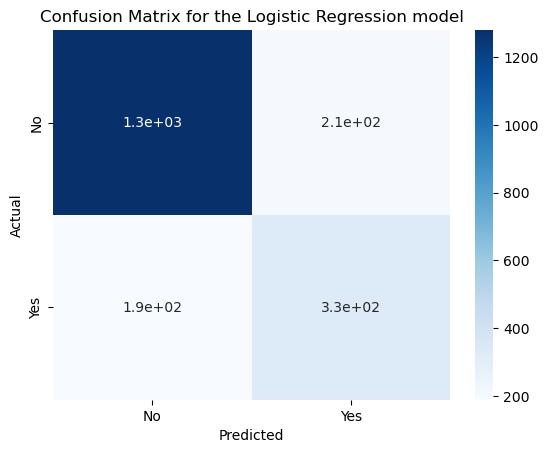

MODEL: SVC
--------------------------------------------------------------------------------
Accuracy is 73%
The classification report : 
               precision    recall  f1-score   support

          No       1.00      0.73      0.85      2007
         Yes       0.00      0.00      0.00         0

    accuracy                           0.73      2007
   macro avg       0.50      0.37      0.42      2007
weighted avg       1.00      0.73      0.85      2007
 


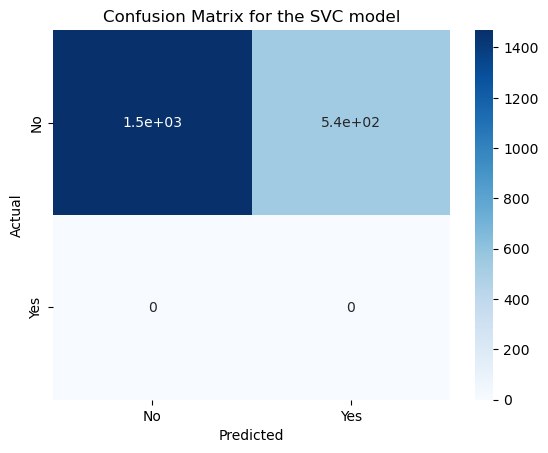

MODEL: K-Nearest Neighbors
--------------------------------------------------------------------------------
Accuracy is 75%
The classification report : 
               precision    recall  f1-score   support

          No       0.88      0.80      0.84      1611
         Yes       0.40      0.54      0.46       396

    accuracy                           0.75      2007
   macro avg       0.64      0.67      0.65      2007
weighted avg       0.78      0.75      0.76      2007
 


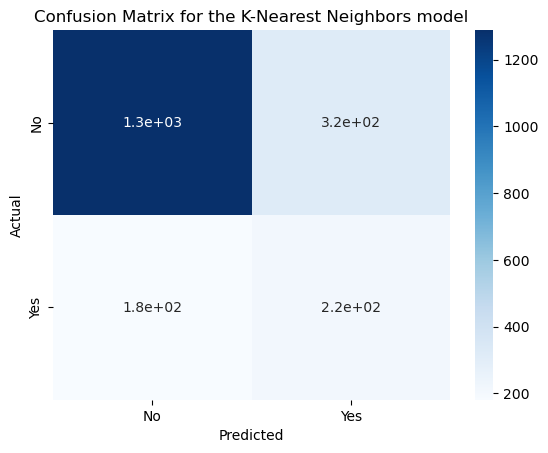

MODEL: Decision Tree
--------------------------------------------------------------------------------
Accuracy is 85%
The classification report : 
               precision    recall  f1-score   support

          No       0.89      0.90      0.90      1454
         Yes       0.73      0.71      0.72       553

    accuracy                           0.85      2007
   macro avg       0.81      0.81      0.81      2007
weighted avg       0.85      0.85      0.85      2007
 


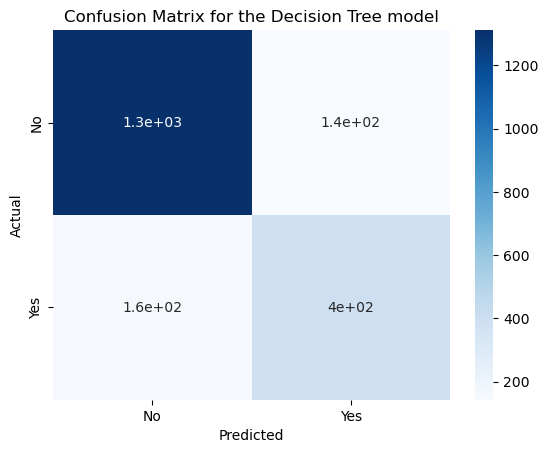

MODEL: Random Forest
--------------------------------------------------------------------------------
Accuracy is 90%
The classification report : 
               precision    recall  f1-score   support

          No       0.96      0.91      0.93      1552
         Yes       0.73      0.86      0.79       455

    accuracy                           0.90      2007
   macro avg       0.84      0.88      0.86      2007
weighted avg       0.91      0.90      0.90      2007
 


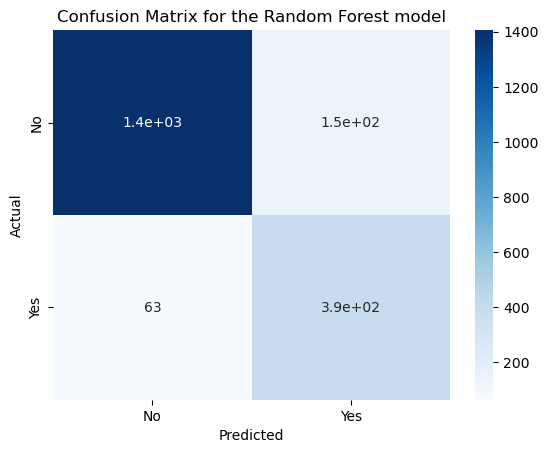

In [29]:
for model_name, model in models:
    modelling(model_name, model, x_train, y_train , x_test , y_test)

A look of at the classification report of all the models created, it can be seen that the models tends to predict customers that does not churn more accurately that customers that churned, this is due to the bias created from class imbalance in our dataset as non churned customers are more than the churned customers. 



The Random forest classifier model created using the preprocessed dataset is the best model for the dataset. This model will be taken as a baseline model.



## Section 2

Before creating other models or trying to improve on the baseline model, we will first attempt to resolve the issue of multicollinearity in which some features in the dataset are correlated. Absence of multicollinearity is a major assumption in linear models and it also affect features importance in ensemble algorithms. To address this issue, we will make use of the VIF(Variance Inflation Factor) which is the ratio of the variance of a parameter estimatewhen fitting a full model that includes other parameters, to the variance of the parameter estimate if the model is fit with only the parameter on its own. 

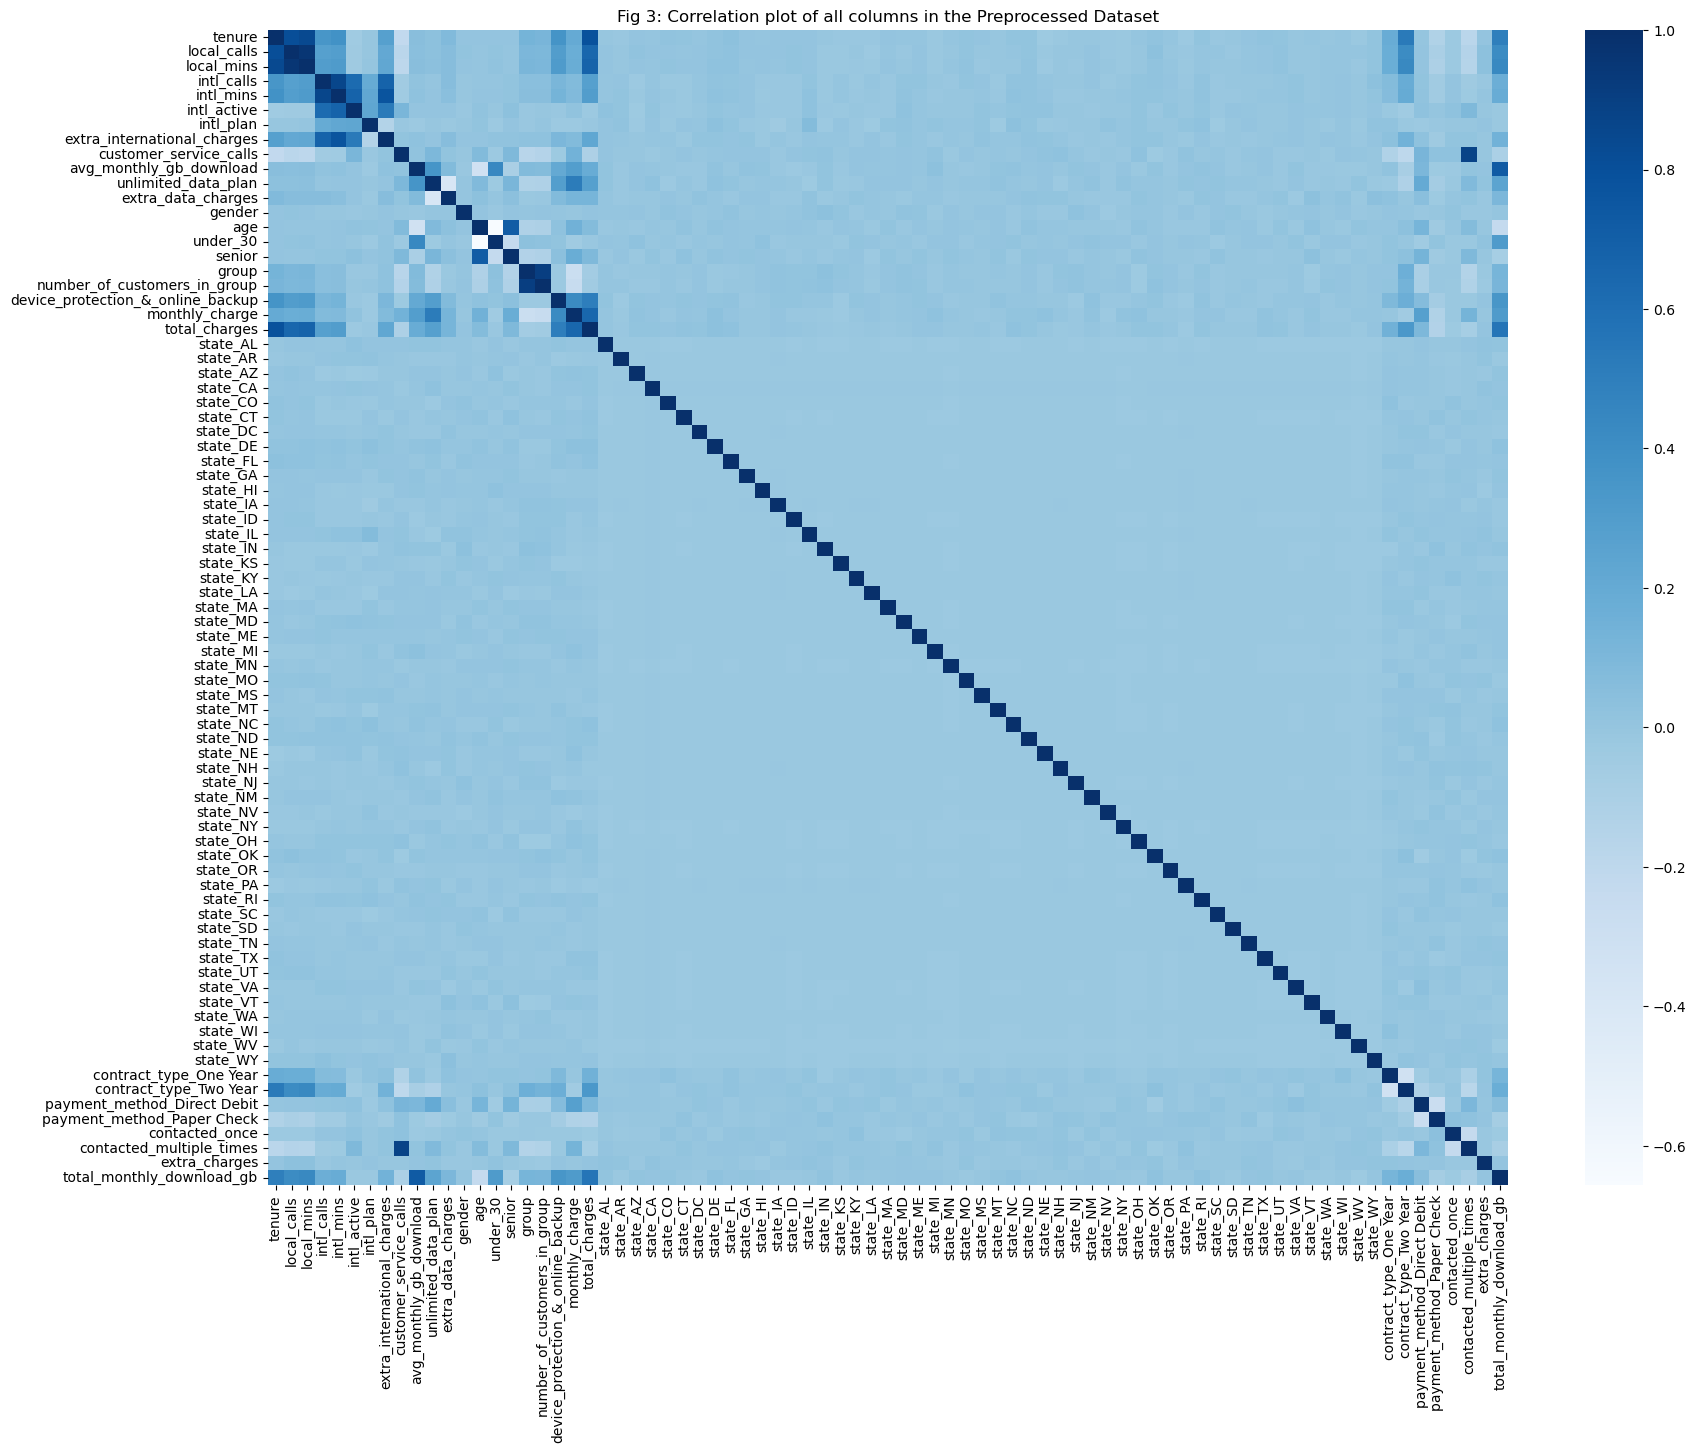

In [30]:
plt.figure(figsize = (20, 15))
sns.heatmap(churn_ohc.corr(), annot = False, cmap = 'Blues')
plt.title('Fig 3: Correlation plot of all columns in the Preprocessed Dataset')
plt.show()

As can be seen from Fig 3 above, the 'intl calls', 'intl mins','local calls', 'local mins', 'tenure', 'age, 'extra_charges', 'total_charges' are highly correlated with each other and with other features. Some or all of these features will be removed from the dataset but first, the VIF score will be calculated for each of the columns. The maximum VIF that can be allowed will be taken as 10 for this dataset and features with a VIF greater than 10 will be dropped.

In [31]:
# Getting a subset dataframe consisting only of numerical values.
numerical_df = churn_ohc.select_dtypes(exclude = 'object')

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data = pd.DataFrame() 
vif_data["feature"] = numerical_df.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(numerical_df.values, i) 
						for i in range(len(numerical_df.columns))] 
pd.set_option('display.max_rows', None)

print(vif_data)

                              feature        VIF
0                              tenure  23.523970
1                         local_calls  27.949088
2                          local_mins  35.129245
3                          intl_calls   4.971064
4                           intl_mins   8.995815
5                         intl_active   3.859980
6                           intl_plan   1.635716
7         extra_international_charges   4.046229
8              customer_service_calls   8.545241
9             avg_monthly_gb_download   7.017841
10                unlimited_data_plan   7.128026
11                 extra_data_charges   1.661429
12                             gender   2.024937
13                                age  27.710651
14                           under_30   2.574336
15                             senior   2.753985
16                              group   7.692269
17       number_of_customers_in_group   7.150537
18  device_protection_&_online_backup   2.213254
19                  

'intl calls', 'intl mins','local calls', 'local mins', 'tenure', 'age, 'extra_charges', 'total_charges' columns has a VIF score greater than 10. We will drop all the columns except the 'tenure' column.

In [33]:
# Dropping the columns with multicollinearity
numerical_df1 = numerical_df.drop(['local_calls', 'intl_calls', 'monthly_charge', 'age', 'total_charges', 'local_mins'], axis = 1)

In [34]:
vif_data = pd.DataFrame() 
vif_data["feature"] = numerical_df1.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(numerical_df1.values, i) 
						for i in range(len(numerical_df1.columns))] 
pd.set_option('display.max_rows', None)

print(vif_data)

                              feature       VIF
0                              tenure  8.693554
1                           intl_mins  6.332882
2                         intl_active  3.731641
3                           intl_plan  1.633806
4         extra_international_charges  4.036272
5              customer_service_calls  8.527546
6             avg_monthly_gb_download  6.656074
7                 unlimited_data_plan  5.683431
8                  extra_data_charges  1.505794
9                              gender  2.019011
10                           under_30  1.725185
11                             senior  1.394840
12                              group  7.560474
13       number_of_customers_in_group  7.142019
14  device_protection_&_online_backup  2.064794
15                           state_AL  1.251765
16                           state_AR  1.157520
17                           state_AZ  1.187083
18                           state_CA  1.109021
19                           state_CO  1

The VIF for the remaining columns are lower than 10. Now, we build a model using these features

In [35]:
x_train_reduced = x_train[numerical_df1.columns]
x_test_reduced = x_test[numerical_df1.columns]

MODEL: Logistic Regression
--------------------------------------------------------------------------------
Accuracy is 87%
The classification report : 
               precision    recall  f1-score   support

          No       0.95      0.88      0.91      1575
         Yes       0.66      0.82      0.73       432

    accuracy                           0.87      2007
   macro avg       0.80      0.85      0.82      2007
weighted avg       0.89      0.87      0.88      2007
 


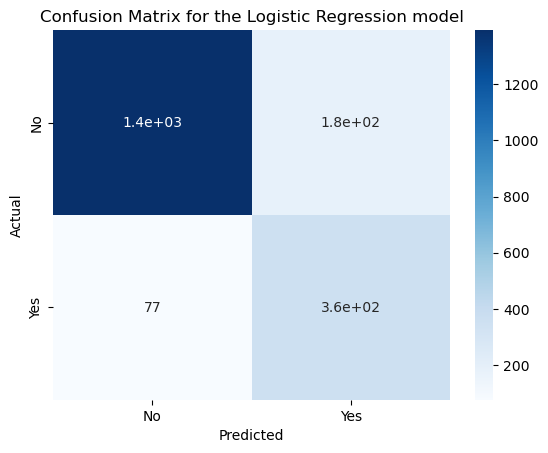

MODEL: SVC
--------------------------------------------------------------------------------
Accuracy is 73%
The classification report : 
               precision    recall  f1-score   support

          No       1.00      0.73      0.85      2001
         Yes       0.01      1.00      0.02         6

    accuracy                           0.73      2007
   macro avg       0.51      0.87      0.43      2007
weighted avg       1.00      0.73      0.84      2007
 


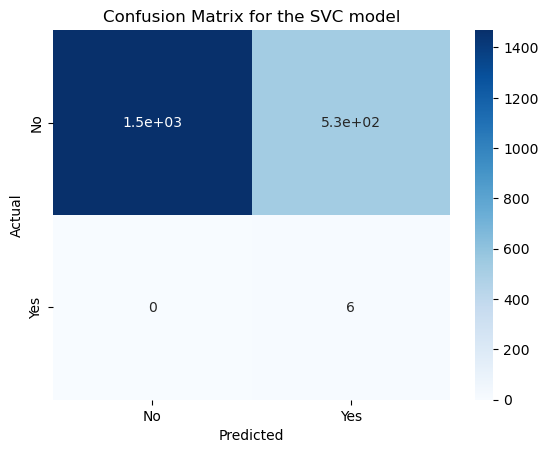

MODEL: K-Nearest Neighbors
--------------------------------------------------------------------------------
Accuracy is 76%
The classification report : 
               precision    recall  f1-score   support

          No       0.90      0.80      0.85      1657
         Yes       0.38      0.59      0.47       350

    accuracy                           0.76      2007
   macro avg       0.64      0.70      0.66      2007
weighted avg       0.81      0.76      0.78      2007
 


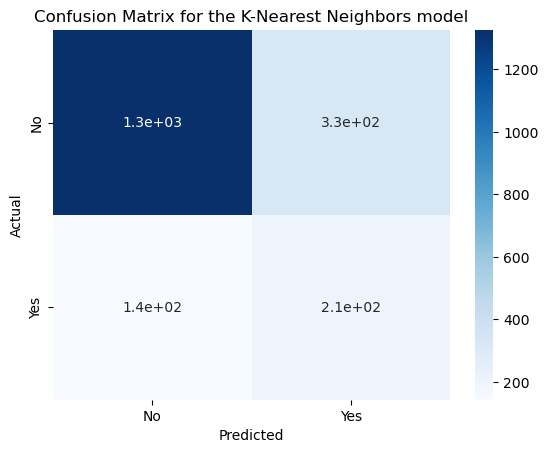

MODEL: Decision Tree
--------------------------------------------------------------------------------
Accuracy is 86%
The classification report : 
               precision    recall  f1-score   support

          No       0.91      0.90      0.90      1481
         Yes       0.72      0.74      0.73       526

    accuracy                           0.86      2007
   macro avg       0.82      0.82      0.82      2007
weighted avg       0.86      0.86      0.86      2007
 


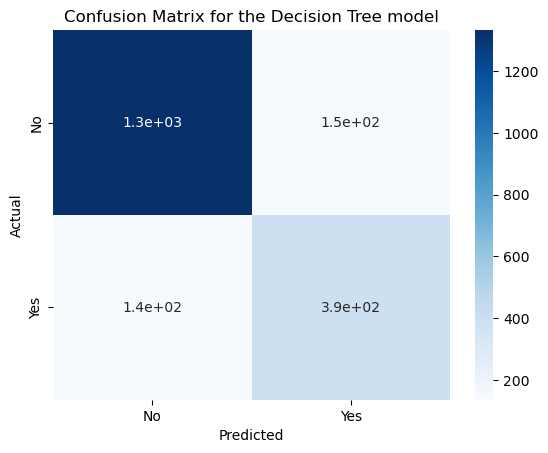

MODEL: Random Forest
--------------------------------------------------------------------------------
Accuracy is 90%
The classification report : 
               precision    recall  f1-score   support

          No       0.96      0.91      0.93      1553
         Yes       0.73      0.86      0.79       454

    accuracy                           0.90      2007
   macro avg       0.84      0.88      0.86      2007
weighted avg       0.91      0.90      0.90      2007
 


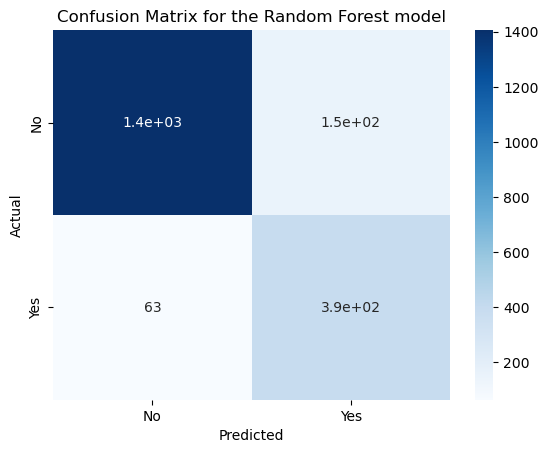

In [36]:
for model_name, model in models:
    modelling(model_name, model, x_train_reduced, y_train , x_test_reduced , y_test)

After eliminating the presence of multicollinearity in the dataset, the performance metrics of the algorithms used prior has improved greatly. This can be seen in the Logistic Regression and SVM algorithm. The random forest model performs the best in this section. Compared to the Random Forest model in section 1, it performs just as good. This is followed by the Logistic Regression model. The models in this section performs better than the models created in Section 1 especially in the areas of precision and recall.

Now, we will first attempt to resolve the issue of class imbalance to see whether it will boost the performance of our classification models. Basically, there are two ways to solve it i.e undersampling and oversampling. For this, we will use the imblearn library and use the Nearmiss algorithm which attempts to undersample the major class and the SMOTE algorithm(Synthetic Majority Oversampling Technique) which attempts to oversample the minority class.

## Section 3

In [37]:
# Employing the near Miss algorithm
from imblearn.under_sampling import NearMiss 
nr = NearMiss()

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 'Yes'))) 
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 'No')))

x_train_nr, y_train_nr = nr.fit_resample(x_train_reduced, y_train.ravel()) 

print('After OverSampling, the shape of x_train: {}'.format(x_train_nr.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_nr.shape)) 
  
print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_nr == 'Yes'))) 
print("After Under Sampling, counts of label 'No': {}".format(sum(y_train_nr == 'No'))) 

Before Under Sampling, counts of label 'Yes': 1258
Before Under Sampling, counts of label 'No': 3422 

After OverSampling, the shape of x_train: (2516, 73)
After OverSampling, the shape of train_y: (2516,) 

After Under Sampling, counts of label 'Yes': 1258
After Under Sampling, counts of label 'No': 1258


MODEL: Logistic Regression
--------------------------------------------------------------------------------
Accuracy is 65%
The classification report : 
               precision    recall  f1-score   support

          No       0.58      0.91      0.71       946
         Yes       0.83      0.42      0.56      1061

    accuracy                           0.65      2007
   macro avg       0.71      0.66      0.64      2007
weighted avg       0.72      0.65      0.63      2007
 


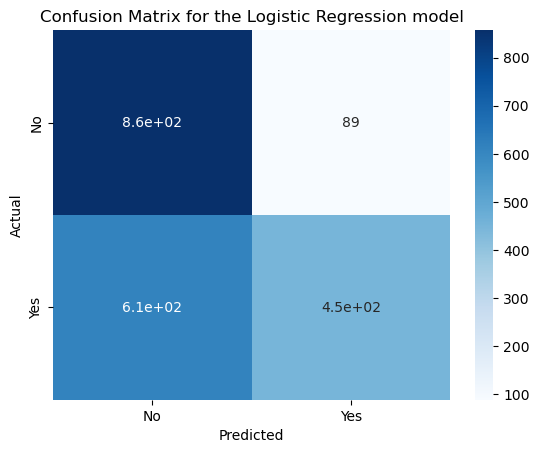

MODEL: SVC
--------------------------------------------------------------------------------
Accuracy is 50%
The classification report : 
               precision    recall  f1-score   support

          No       0.51      0.73      0.60      1024
         Yes       0.49      0.27      0.34       983

    accuracy                           0.50      2007
   macro avg       0.50      0.50      0.47      2007
weighted avg       0.50      0.50      0.47      2007
 


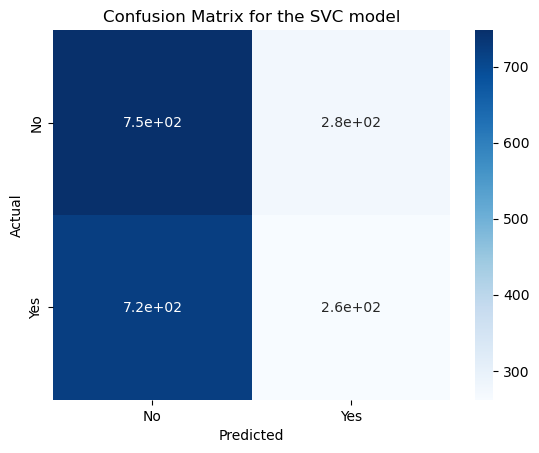

MODEL: K-Nearest Neighbors
--------------------------------------------------------------------------------
Accuracy is 51%
The classification report : 
               precision    recall  f1-score   support

          No       0.45      0.79      0.58       843
         Yes       0.67      0.31      0.42      1164

    accuracy                           0.51      2007
   macro avg       0.56      0.55      0.50      2007
weighted avg       0.58      0.51      0.49      2007
 


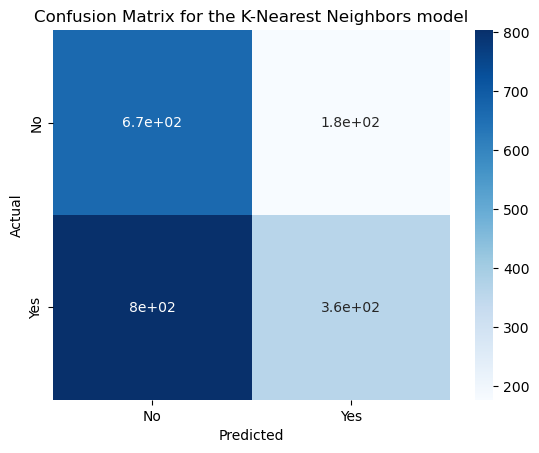

MODEL: Decision Tree
--------------------------------------------------------------------------------
Accuracy is 64%
The classification report : 
               precision    recall  f1-score   support

          No       0.57      0.90      0.70       923
         Yes       0.83      0.41      0.55      1084

    accuracy                           0.64      2007
   macro avg       0.70      0.66      0.62      2007
weighted avg       0.71      0.64      0.62      2007
 


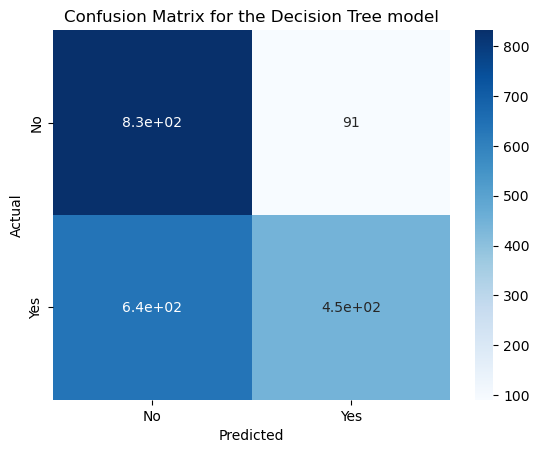

MODEL: Random Forest
--------------------------------------------------------------------------------
Accuracy is 65%
The classification report : 
               precision    recall  f1-score   support

          No       0.58      0.92      0.71       919
         Yes       0.86      0.43      0.57      1088

    accuracy                           0.65      2007
   macro avg       0.72      0.67      0.64      2007
weighted avg       0.73      0.65      0.63      2007
 


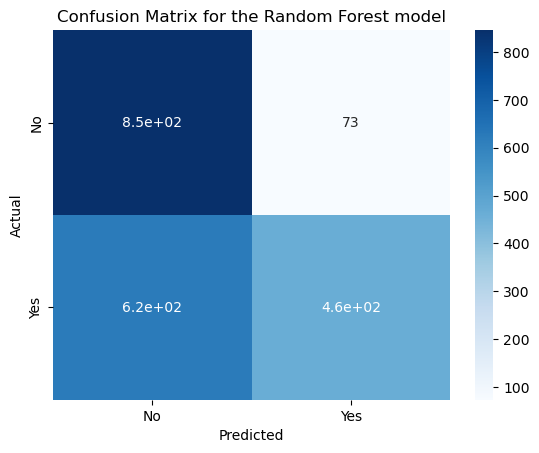

In [38]:
for model_name, model in models:
    modelling(model_name, model, x_train_nr, y_train_nr , x_test_reduced , y_test)

The near miss algorithm did not increase the performance metrics of the models when compared to the model created by removing the multicollinearity from our dataset. The models created in this section did not perform better as the models created in section 2

## Section 4

In [39]:
# Employing the SMOTE algorithm.
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state = 105) 

print("Before OverSampling, counts of label 'Yes': {}".format(sum(y_train == 'Yes'))) 
print("Before OverSampling, counts of label 'No': {} \n".format(sum(y_train == 'No'))) 
  
x_train_res, y_train_res = smote.fit_resample(x_train_reduced, y_train.ravel()) 
  
print('After OverSampling, the shape of x_train: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_res == 'Yes'))) 
print("After OverSampling, counts of label 'No': {}".format(sum(y_train_res == 'No'))) 

Before OverSampling, counts of label 'Yes': 1258
Before OverSampling, counts of label 'No': 3422 

After OverSampling, the shape of x_train: (6844, 73)
After OverSampling, the shape of train_y: (6844,) 

After OverSampling, counts of label 'Yes': 3422
After OverSampling, counts of label 'No': 3422


MODEL: Logistic Regression
--------------------------------------------------------------------------------
Accuracy is 83%
The classification report : 
               precision    recall  f1-score   support

          No       0.82      0.94      0.88      1286
         Yes       0.85      0.64      0.73       721

    accuracy                           0.83      2007
   macro avg       0.84      0.79      0.80      2007
weighted avg       0.83      0.83      0.82      2007
 


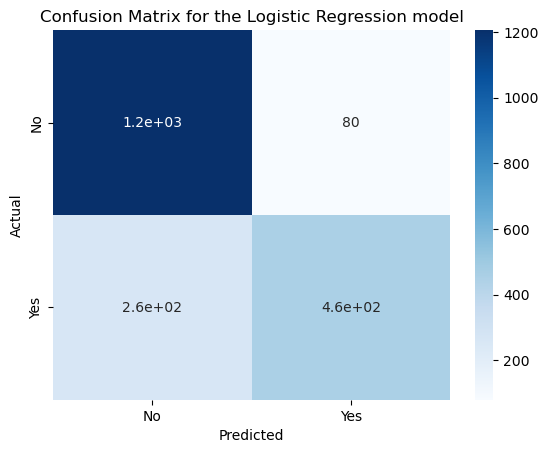

MODEL: SVC
--------------------------------------------------------------------------------
Accuracy is 64%
The classification report : 
               precision    recall  f1-score   support

          No       0.59      0.88      0.71       983
         Yes       0.79      0.41      0.54      1024

    accuracy                           0.64      2007
   macro avg       0.69      0.65      0.63      2007
weighted avg       0.69      0.64      0.62      2007
 


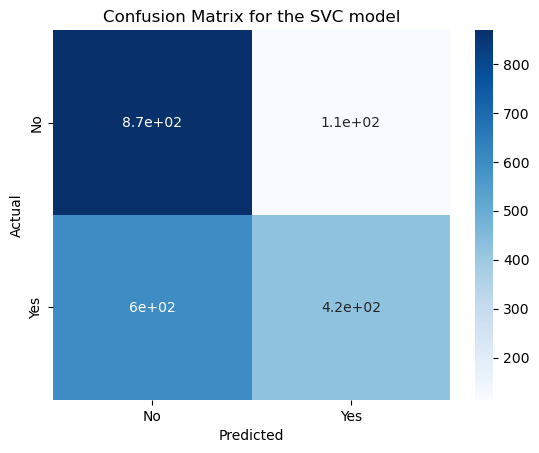

MODEL: K-Nearest Neighbors
--------------------------------------------------------------------------------
Accuracy is 69%
The classification report : 
               precision    recall  f1-score   support

          No       0.70      0.86      0.77      1200
         Yes       0.68      0.45      0.54       807

    accuracy                           0.69      2007
   macro avg       0.69      0.65      0.66      2007
weighted avg       0.69      0.69      0.68      2007
 


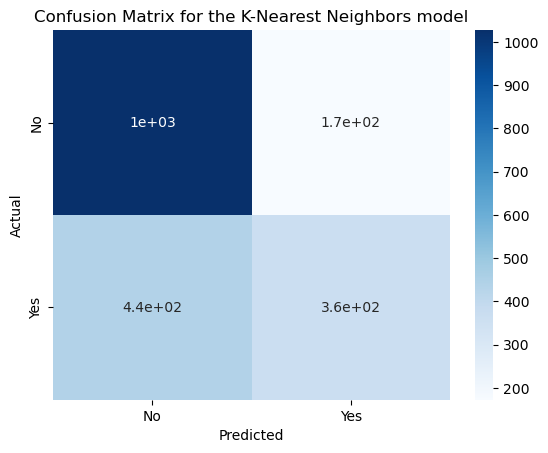

MODEL: Decision Tree
--------------------------------------------------------------------------------
Accuracy is 82%
The classification report : 
               precision    recall  f1-score   support

          No       0.85      0.90      0.88      1380
         Yes       0.75      0.65      0.70       627

    accuracy                           0.82      2007
   macro avg       0.80      0.77      0.79      2007
weighted avg       0.82      0.82      0.82      2007
 


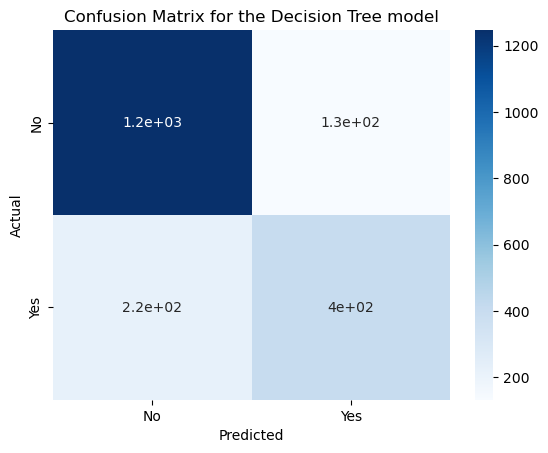

MODEL: Random Forest
--------------------------------------------------------------------------------
Accuracy is 87%
The classification report : 
               precision    recall  f1-score   support

          No       0.88      0.94      0.91      1380
         Yes       0.83      0.72      0.77       627

    accuracy                           0.87      2007
   macro avg       0.86      0.83      0.84      2007
weighted avg       0.87      0.87      0.86      2007
 


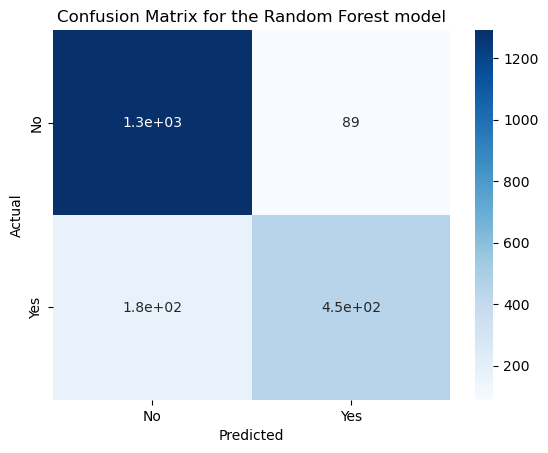

In [40]:
for model_name, model in models:
    modelling(model_name, model, x_train_res, y_train_res , x_test_reduced , y_test)

The SMOTE algorithm did not also increase the performance metrics of the models when compared to the model created by removing the multicollinearity from our dataset. Removing class imbalance from our dataset did not improve the performance of our modelling process. The models created in this section did not perform better as the models created in section 2

The best model so far is the Random Forest Algorithm with default parameters using the dataset where multicollinearity was eliminated i.e the dataset from section 2. This is because it achieved good performances even as comparable as the random fotest model created in section 1 but by using fewer features. The next thing is to use hyperparameter tuning to find the optimum parameters for our models.

## Hyperparameter Tuning



Tuning the parameters of the Chosen Model to make it perform better.

In [41]:
# Printing the list containing all the algorithms used so far
models

[('Logistic Regression', LogisticRegression()),
 ('SVC', SVC()),
 ('K-Nearest Neighbors', KNeighborsClassifier()),
 ('Decision Tree', DecisionTreeClassifier()),
 ('Random Forest', RandomForestClassifier())]

In [42]:
params = {'max_depth': [3, 6, 10, 15],
              'max_features': [5, 10, 15, 20],
              'min_samples_split': np.arange(5, 15, 1),
              'n_estimators': [100, 200, 300]
              }

In [43]:
grid = GridSearchCV(estimator = models[4][1], param_grid = params, 
                          cv = 3, n_jobs = -1)

In [44]:
grid.fit(x_train_reduced, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 10, 15],
                         'max_features': [5, 10, 15, 20],
                         'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'n_estimators': [100, 200, 300]})

In [45]:
grid.best_estimator_

RandomForestClassifier(max_depth=15, max_features=15, min_samples_split=6,
                       n_estimators=300)

MODEL: Random Forest with tuned parameters
--------------------------------------------------------------------------------
Accuracy is 90%
The classification report : 
               precision    recall  f1-score   support

          No       0.96      0.90      0.93      1555
         Yes       0.72      0.86      0.79       452

    accuracy                           0.90      2007
   macro avg       0.84      0.88      0.86      2007
weighted avg       0.91      0.90      0.90      2007
 


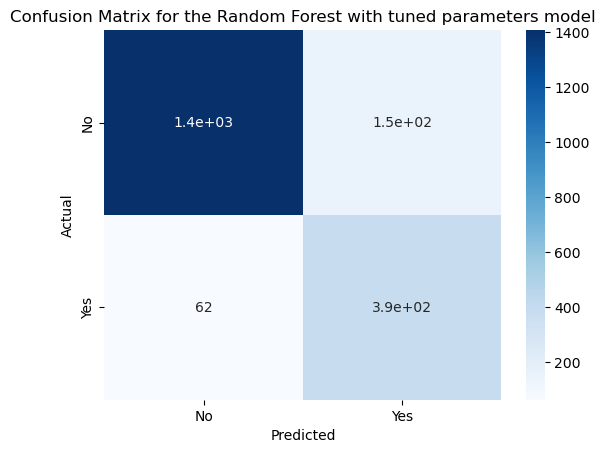

In [46]:
rf_grid_model = modelling('Random Forest with tuned parameters', grid.best_estimator_ , x_train_reduced , y_train , x_test_reduced , y_test)
rf_grid_model

The random forest model with tuned hyperparameters performed better than all other models on all evaluation metrics althouth the r2 score for the training set was reduced. This is taken as our final model.



## Winner
The random forest model with these hyperparameters: RandomForestClassifier(max_depth=15, max_features=15, min_samples_split=6, n_estimators=300) performed the best.

In [47]:
# Saving the model....
link = open(r'rf_churn.pkl', 'wb')
pickle.dump(rf_grid_model, link)
link.close()